<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Insect_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade numpy==1.22.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
rembg 2.0.35 requires numpy>=1.23.5, but you have numpy 1.22.0 which is incompatible.


In [2]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0


In [3]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [6]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 95 (delta 56), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (95/95), 37.27 MiB | 1.61 MiB/s, done.


In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [10]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/Training/'+cls
    for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        
        #Resize
        resizedImage = cv2.resize(realimage, (400,400))
        #contrast improve
        color_contrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        smooth_image=img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(smooth_image)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogram_image=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        clahe_image=cv2.merge((op2_R,op2_G,op2_B))
        #outputImages=[smooth_image, histogram_image,clahe_image]
        #titles=['Original Image','Adjust histogram','clahe Image']
        #for i in range(3):
         #   plt.subplot(1,3,i+1)
          #  plt.imshow(outputImages[i])
           # plt.title(titles[i])
            #plt.xticks([])
            #plt.yticks([])
        #plt.show()
       
        x.append(clahe_image)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/Preprocessed/'+str(img_no)+'.jpg',clahe_image)   
        #img_no+=1
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

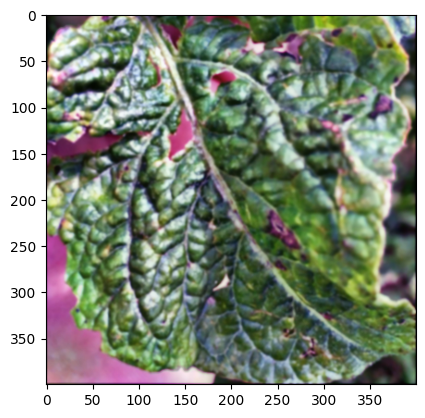

In [11]:
plt.imshow(x[150])

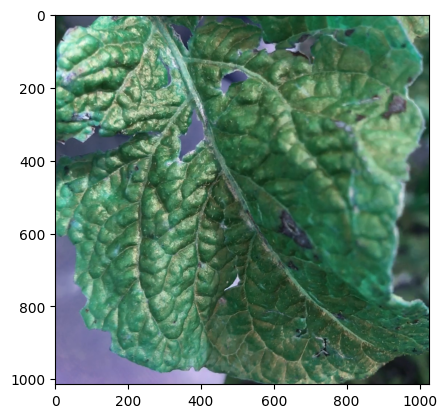

In [12]:
plt.imshow(z[150])

(array([   0.,   10.,   10.,   43.,   56.,   89.,  104.,  122.,  148.,
         161.,  229.,  307.,  419.,  478.,  598.,  712.,  793., 1003.,
         946., 1252., 1278., 1286., 1499., 1445., 1473., 1471., 1626.,
        1547., 1649., 1582., 1578., 1692., 1625., 1737., 1634., 1639.,
        1711., 1845., 1757., 1770., 1905., 1716., 1829., 2060., 1759.,
        1833., 1784., 1696., 1928., 1639., 1782., 1606., 1825., 1751.,
        1605., 1698., 1609., 1613., 1589., 1522., 1468., 1489., 1502.,
        1496., 1493., 1500., 1524., 1404., 1529., 1489., 1520., 1551.,
        1537., 1478., 1521., 1499., 1522., 1502., 1558., 1532., 1593.,
        1568., 1465., 1582., 1564., 1611., 1603., 1651., 1660., 1583.,
        1636., 1693., 1719., 1813., 1786., 1769., 1737., 1709., 1833.,
        1822., 1890., 1817., 1859., 1826., 1882., 2007., 1931., 1931.,
        1913., 1984., 1947., 1948., 2041., 1962., 1941., 1947., 1955.,
        2031., 2104., 2095., 2092., 2073., 2172., 2116., 2077., 2241.,
      

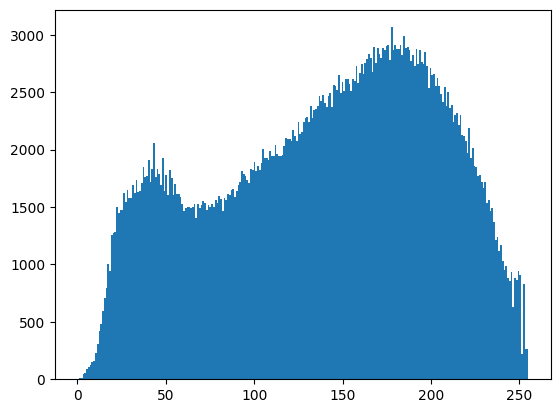

In [13]:
plt.hist(x[100].flat, bins=256, range=(0,255))

In [ ]:
x=[]
pth = '/content/drive/MyDrive/Insect/Preprocessed'
for j in os.listdir(pth):
        realimage = cv2.imread(pth+'/'+j,1)
        img1 = cv2.resize(realimage, (400,400))
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)
        #cv2.imwrite('C:/Users/Nalinda/Desktop/reseach-level4/disease_detection_images/bgremove/'+str(img_no)+'.jpg',bg_rem_img)   
        #img_no+=1

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 102GB/s]


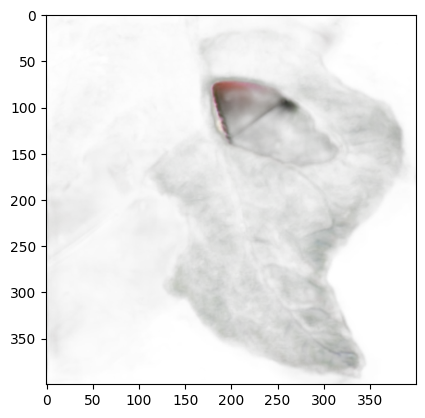

In [ ]:
plt.imshow(x[150])

In [14]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/bgremove/')
classes = {'colo':0, 'flea':1}

In [108]:
x=[]
y=[]
z=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1) 

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)
        
        x.append(result)
        y.append(classes[cls])
        z.append(img)

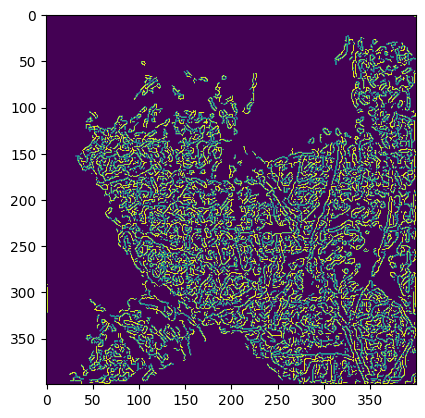

In [109]:
plt.imshow(x[15])

In [114]:
np.unique(y)

array([0, 1])

In [115]:
x=np.array(x)
y=np.array(y)

In [116]:
pd.Series(y). value_counts()

0    210
1    190
dtype: int64

In [117]:
#Prepare data
x_updated = x.reshape(len(x), -1)
x_updated.shape

(400, 160000)

In [118]:
# Split dataset into random train and test subsets:
xtrain, xtest,ytrain,ytest = train_test_split(x_updated, y, random_state=10,test_size=20)

In [119]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [120]:
#Feature Scalling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [121]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [122]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)

In [123]:
#feature extraction and dimensionality reduction
from sklearn.decomposition import PCA

In [124]:
#Feature Selection : PCA
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(380, 160000) (20, 160000)


In [125]:
print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

(380, 160000) (20, 160000)


In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
lg=LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
#import warnings
#warnings.filterwarnings('ignore')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
print("Training Score:",lg.score(pca_train,ytrain))
print("Testing Score:",lg.score(pca_test,ytest))

Training Score: 0.9763157894736842
Testing Score: 0.95


In [128]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [129]:
print("Training Score:",sv.score(pca_train,ytrain))
print("Testing Score:",sv.score(pca_test,ytest))

Training Score: 0.9394736842105263
Testing Score: 0.9


In [130]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([3, 5]),)

In [131]:
pred[18]

0

In [132]:
ytest[15]

1

In [133]:
dec={0:'colorado', 1:'flea'}

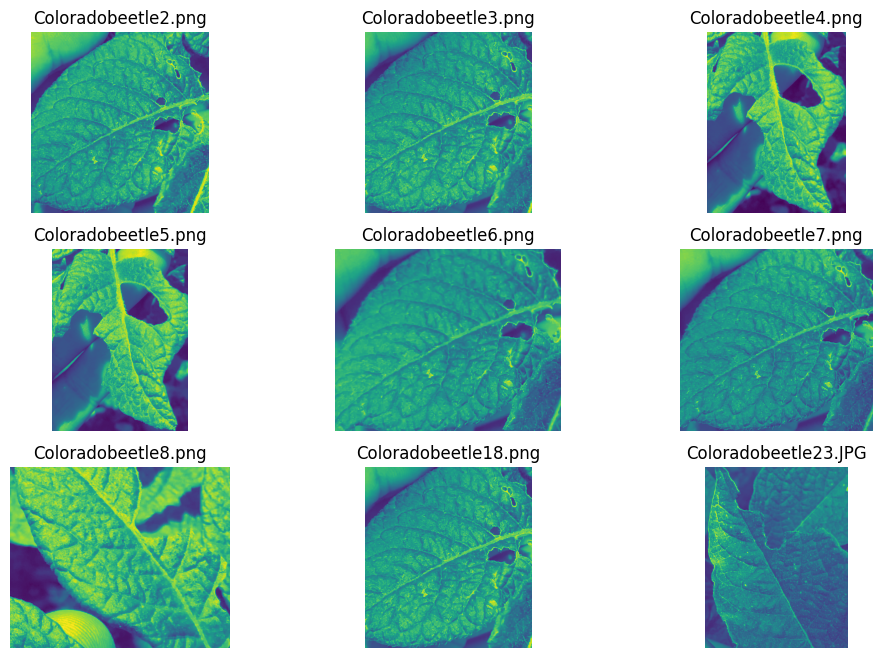

In [134]:
#test
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/'+i,0)
    img1=cv2.resize(img,(400,400))
    img2=img1.reshape(1,-1)/255
    #p=sv.predict(img2)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1

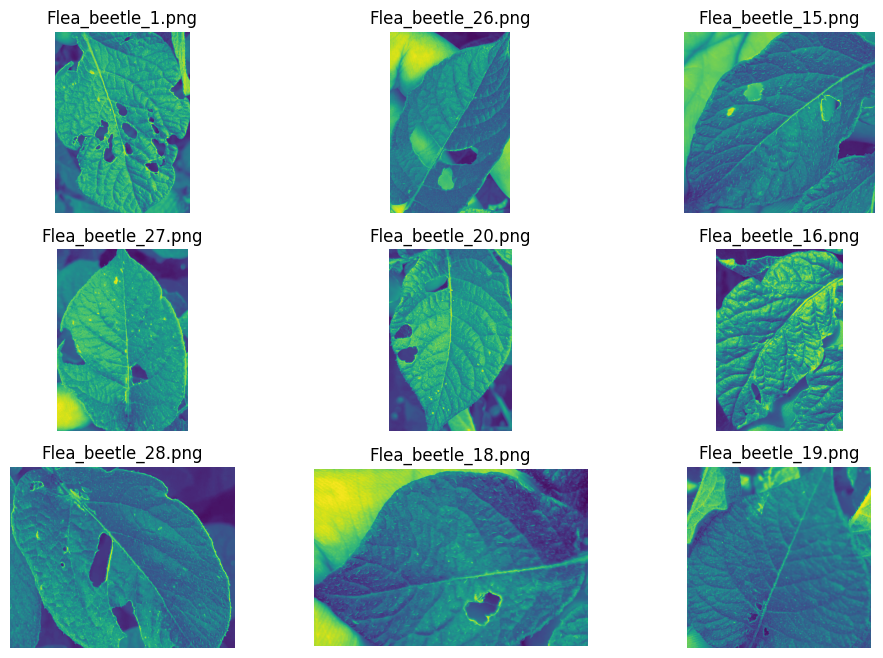

In [135]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/Insect/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:9]:
    plt.subplot(3,3,c)

    img=cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/'+i,0)
    img1=cv2.resize(img,(400,400))
    img1=img1.reshape(1,-1)/255
    #p=sv.predict(img1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    c+=1